# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [31]:
!pip install matplotlib --upgrade

    100% |████████████████████████████████| 12.6MB 55kB/s  eta 0:00:01
    100% |████████████████████████████████| 512kB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 3.1MB/s eta 0:00:01
Requirement already up-to-date: cycler>=0.10 in /opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg (from matplotlib)
Requirement already up-to-date: six>=1.10 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 952kB 772kB/s eta 0:00:01
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from matplotlib)
    100% |████████████████████████████████| 12.2MB 56kB/s  eta 0:00:01
    100% |████████████████████████████████| 573kB 1.3MB/s eta 0:00:01
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
     

In [33]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 473kB/s ta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


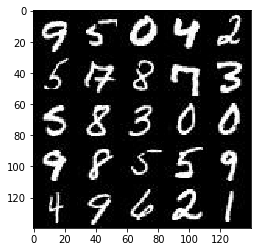

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

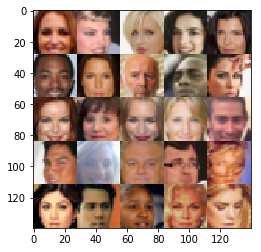

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [7]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=[None, z_dim], name='input_z')
    lr = tf.placeholder(tf.float32, None, name='lr')
    
    return inputs_real, inputs_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [40]:
def discriminator(images, reuse=False, alpha=0.01):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # Input layer 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [48]:
def generator(z, out_channel_dim, is_train=True, alpha=0.01):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 7*7*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 7x7x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, 1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 7*7*256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_channel_dim
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [56]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.9):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * alpha))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [57]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [58]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [59]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps +=1
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Batch {}...".format(steps),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Batch 10... Discriminator Loss: 0.9056... Generator Loss: 0.9438
Epoch 1/2... Batch 20... Discriminator Loss: 0.5238... Generator Loss: 6.8572
Epoch 1/2... Batch 30... Discriminator Loss: 0.5126... Generator Loss: 2.8989
Epoch 1/2... Batch 40... Discriminator Loss: 0.8030... Generator Loss: 1.6686
Epoch 1/2... Batch 50... Discriminator Loss: 0.5357... Generator Loss: 2.5578
Epoch 1/2... Batch 60... Discriminator Loss: 0.9965... Generator Loss: 4.5967
Epoch 1/2... Batch 70... Discriminator Loss: 0.6566... Generator Loss: 2.9430
Epoch 1/2... Batch 80... Discriminator Loss: 0.7358... Generator Loss: 1.9528
Epoch 1/2... Batch 90... Discriminator Loss: 0.8432... Generator Loss: 2.4548
Epoch 1/2... Batch 100... Discriminator Loss: 0.6506... Generator Loss: 2.6989


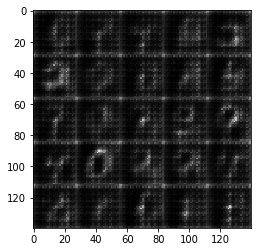

Epoch 1/2... Batch 110... Discriminator Loss: 0.7788... Generator Loss: 3.2828
Epoch 1/2... Batch 120... Discriminator Loss: 1.8089... Generator Loss: 0.3891
Epoch 1/2... Batch 130... Discriminator Loss: 1.2815... Generator Loss: 5.6982
Epoch 1/2... Batch 140... Discriminator Loss: 0.5119... Generator Loss: 2.1067
Epoch 1/2... Batch 150... Discriminator Loss: 0.3532... Generator Loss: 7.6062
Epoch 1/2... Batch 160... Discriminator Loss: 0.3532... Generator Loss: 5.3643
Epoch 1/2... Batch 170... Discriminator Loss: 0.4927... Generator Loss: 2.2941
Epoch 1/2... Batch 180... Discriminator Loss: 0.8480... Generator Loss: 1.3139
Epoch 1/2... Batch 190... Discriminator Loss: 0.5431... Generator Loss: 2.7400
Epoch 1/2... Batch 200... Discriminator Loss: 0.6532... Generator Loss: 2.7249


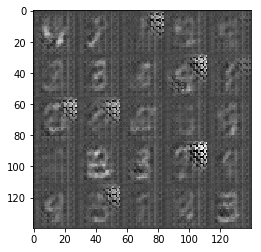

Epoch 1/2... Batch 210... Discriminator Loss: 0.3545... Generator Loss: 5.9399
Epoch 1/2... Batch 220... Discriminator Loss: 0.4014... Generator Loss: 5.5056
Epoch 1/2... Batch 230... Discriminator Loss: 0.4933... Generator Loss: 2.7354
Epoch 1/2... Batch 240... Discriminator Loss: 1.6870... Generator Loss: 0.3612
Epoch 1/2... Batch 250... Discriminator Loss: 1.0261... Generator Loss: 0.9840
Epoch 1/2... Batch 260... Discriminator Loss: 1.3295... Generator Loss: 4.2447
Epoch 1/2... Batch 270... Discriminator Loss: 0.8561... Generator Loss: 2.0127
Epoch 1/2... Batch 280... Discriminator Loss: 0.9396... Generator Loss: 0.9919
Epoch 1/2... Batch 290... Discriminator Loss: 0.8041... Generator Loss: 2.2279
Epoch 1/2... Batch 300... Discriminator Loss: 0.7900... Generator Loss: 2.9082


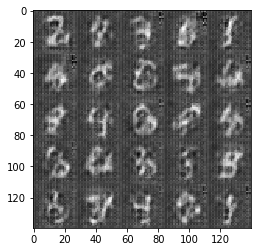

Epoch 1/2... Batch 310... Discriminator Loss: 0.8187... Generator Loss: 1.3237
Epoch 1/2... Batch 320... Discriminator Loss: 0.7090... Generator Loss: 1.3417
Epoch 1/2... Batch 330... Discriminator Loss: 0.4722... Generator Loss: 2.7719
Epoch 1/2... Batch 340... Discriminator Loss: 0.8988... Generator Loss: 1.5937
Epoch 1/2... Batch 350... Discriminator Loss: 0.6075... Generator Loss: 1.7460
Epoch 1/2... Batch 360... Discriminator Loss: 1.3765... Generator Loss: 0.5630
Epoch 1/2... Batch 370... Discriminator Loss: 0.9066... Generator Loss: 1.2146
Epoch 1/2... Batch 380... Discriminator Loss: 1.0790... Generator Loss: 0.7607
Epoch 1/2... Batch 390... Discriminator Loss: 0.5708... Generator Loss: 2.9148
Epoch 1/2... Batch 400... Discriminator Loss: 0.6920... Generator Loss: 1.3701


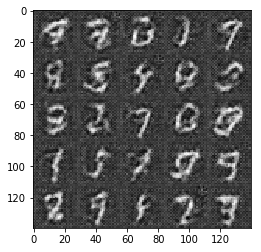

Epoch 1/2... Batch 410... Discriminator Loss: 0.7374... Generator Loss: 1.4475
Epoch 1/2... Batch 420... Discriminator Loss: 0.7304... Generator Loss: 1.6399
Epoch 1/2... Batch 430... Discriminator Loss: 0.5658... Generator Loss: 2.0844
Epoch 1/2... Batch 440... Discriminator Loss: 0.4411... Generator Loss: 2.6369
Epoch 1/2... Batch 450... Discriminator Loss: 0.3975... Generator Loss: 3.1039
Epoch 1/2... Batch 460... Discriminator Loss: 0.3569... Generator Loss: 4.7545
Epoch 2/2... Batch 10... Discriminator Loss: 0.3654... Generator Loss: 4.0367
Epoch 2/2... Batch 20... Discriminator Loss: 1.5878... Generator Loss: 0.4303
Epoch 2/2... Batch 30... Discriminator Loss: 1.0344... Generator Loss: 2.2233
Epoch 2/2... Batch 40... Discriminator Loss: 0.8858... Generator Loss: 1.7885
Epoch 2/2... Batch 50... Discriminator Loss: 2.3561... Generator Loss: 3.8896
Epoch 2/2... Batch 60... Discriminator Loss: 0.8927... Generator Loss: 1.1779
Epoch 2/2... Batch 70... Discriminator Loss: 0.7531... Gen

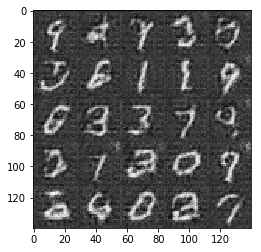

Epoch 2/2... Batch 110... Discriminator Loss: 0.5251... Generator Loss: 1.9741
Epoch 2/2... Batch 120... Discriminator Loss: 4.2279... Generator Loss: 0.0374
Epoch 2/2... Batch 130... Discriminator Loss: 0.9326... Generator Loss: 2.4915
Epoch 2/2... Batch 140... Discriminator Loss: 0.7014... Generator Loss: 2.5787
Epoch 2/2... Batch 150... Discriminator Loss: 0.5620... Generator Loss: 2.8923
Epoch 2/2... Batch 160... Discriminator Loss: 0.3948... Generator Loss: 4.6246
Epoch 2/2... Batch 170... Discriminator Loss: 0.5762... Generator Loss: 1.7456
Epoch 2/2... Batch 180... Discriminator Loss: 2.7682... Generator Loss: 0.1762
Epoch 2/2... Batch 190... Discriminator Loss: 0.6160... Generator Loss: 1.8551
Epoch 2/2... Batch 200... Discriminator Loss: 0.7973... Generator Loss: 1.2364


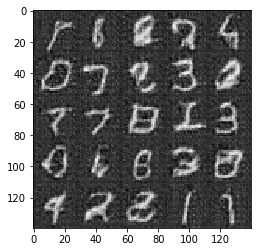

Epoch 2/2... Batch 210... Discriminator Loss: 0.7112... Generator Loss: 1.6460
Epoch 2/2... Batch 220... Discriminator Loss: 1.5437... Generator Loss: 2.9104
Epoch 2/2... Batch 230... Discriminator Loss: 0.7412... Generator Loss: 1.6274
Epoch 2/2... Batch 240... Discriminator Loss: 0.7137... Generator Loss: 1.4063
Epoch 2/2... Batch 250... Discriminator Loss: 0.4923... Generator Loss: 3.9934
Epoch 2/2... Batch 260... Discriminator Loss: 0.4054... Generator Loss: 3.3868
Epoch 2/2... Batch 270... Discriminator Loss: 0.4000... Generator Loss: 4.6995
Epoch 2/2... Batch 280... Discriminator Loss: 0.4095... Generator Loss: 2.9960
Epoch 2/2... Batch 290... Discriminator Loss: 0.3807... Generator Loss: 3.6526
Epoch 2/2... Batch 300... Discriminator Loss: 0.3763... Generator Loss: 4.1014


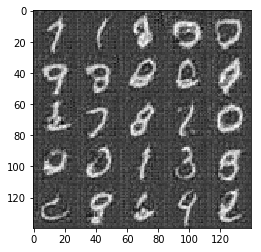

Epoch 2/2... Batch 310... Discriminator Loss: 0.3641... Generator Loss: 4.5204
Epoch 2/2... Batch 320... Discriminator Loss: 0.5766... Generator Loss: 1.7407
Epoch 2/2... Batch 330... Discriminator Loss: 1.5236... Generator Loss: 3.4829
Epoch 2/2... Batch 340... Discriminator Loss: 0.6687... Generator Loss: 1.7181
Epoch 2/2... Batch 350... Discriminator Loss: 1.1802... Generator Loss: 0.6285
Epoch 2/2... Batch 360... Discriminator Loss: 1.0750... Generator Loss: 0.7563
Epoch 2/2... Batch 370... Discriminator Loss: 0.6021... Generator Loss: 1.6455
Epoch 2/2... Batch 380... Discriminator Loss: 0.8218... Generator Loss: 1.8744
Epoch 2/2... Batch 390... Discriminator Loss: 0.6910... Generator Loss: 1.3700
Epoch 2/2... Batch 400... Discriminator Loss: 0.5788... Generator Loss: 1.7022


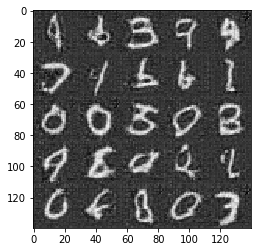

Epoch 2/2... Batch 410... Discriminator Loss: 0.3688... Generator Loss: 3.8145
Epoch 2/2... Batch 420... Discriminator Loss: 0.4278... Generator Loss: 2.6967
Epoch 2/2... Batch 430... Discriminator Loss: 0.4472... Generator Loss: 2.5719
Epoch 2/2... Batch 440... Discriminator Loss: 3.8705... Generator Loss: 2.9889
Epoch 2/2... Batch 450... Discriminator Loss: 0.9119... Generator Loss: 0.9974
Epoch 2/2... Batch 460... Discriminator Loss: 0.8527... Generator Loss: 1.1595


In [60]:
batch_size = 128
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Batch 10... Discriminator Loss: 1.5561... Generator Loss: 0.5035
Epoch 1/1... Batch 20... Discriminator Loss: 0.8657... Generator Loss: 1.1472
Epoch 1/1... Batch 30... Discriminator Loss: 0.9362... Generator Loss: 1.1199
Epoch 1/1... Batch 40... Discriminator Loss: 0.6343... Generator Loss: 1.6959
Epoch 1/1... Batch 50... Discriminator Loss: 0.6389... Generator Loss: 1.8769
Epoch 1/1... Batch 60... Discriminator Loss: 0.5542... Generator Loss: 2.1226
Epoch 1/1... Batch 70... Discriminator Loss: 0.6742... Generator Loss: 4.6320
Epoch 1/1... Batch 80... Discriminator Loss: 0.8034... Generator Loss: 1.2867
Epoch 1/1... Batch 90... Discriminator Loss: 0.5660... Generator Loss: 2.2011
Epoch 1/1... Batch 100... Discriminator Loss: 0.5891... Generator Loss: 2.0235


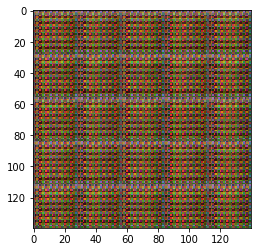

Epoch 1/1... Batch 110... Discriminator Loss: 0.5182... Generator Loss: 2.1599
Epoch 1/1... Batch 120... Discriminator Loss: 0.4692... Generator Loss: 2.6610
Epoch 1/1... Batch 130... Discriminator Loss: 0.4368... Generator Loss: 2.9193
Epoch 1/1... Batch 140... Discriminator Loss: 0.4873... Generator Loss: 2.5358
Epoch 1/1... Batch 150... Discriminator Loss: 0.6784... Generator Loss: 1.4320
Epoch 1/1... Batch 160... Discriminator Loss: 0.6050... Generator Loss: 1.6070
Epoch 1/1... Batch 170... Discriminator Loss: 0.5055... Generator Loss: 2.8348
Epoch 1/1... Batch 180... Discriminator Loss: 0.4897... Generator Loss: 2.5355
Epoch 1/1... Batch 190... Discriminator Loss: 0.5317... Generator Loss: 2.1651
Epoch 1/1... Batch 200... Discriminator Loss: 0.5221... Generator Loss: 2.3440


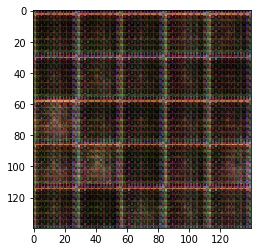

Epoch 1/1... Batch 210... Discriminator Loss: 0.5292... Generator Loss: 2.2195
Epoch 1/1... Batch 220... Discriminator Loss: 0.5183... Generator Loss: 2.3480
Epoch 1/1... Batch 230... Discriminator Loss: 0.9127... Generator Loss: 0.9196
Epoch 1/1... Batch 240... Discriminator Loss: 1.2164... Generator Loss: 0.6262
Epoch 1/1... Batch 250... Discriminator Loss: 0.9630... Generator Loss: 4.4311
Epoch 1/1... Batch 260... Discriminator Loss: 0.5885... Generator Loss: 2.7385
Epoch 1/1... Batch 270... Discriminator Loss: 0.6313... Generator Loss: 2.5122
Epoch 1/1... Batch 280... Discriminator Loss: 1.4884... Generator Loss: 0.4839
Epoch 1/1... Batch 290... Discriminator Loss: 0.9044... Generator Loss: 3.3075
Epoch 1/1... Batch 300... Discriminator Loss: 0.7653... Generator Loss: 3.4305


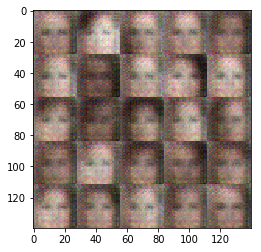

Epoch 1/1... Batch 310... Discriminator Loss: 0.5238... Generator Loss: 3.1005
Epoch 1/1... Batch 320... Discriminator Loss: 0.6873... Generator Loss: 3.4854
Epoch 1/1... Batch 330... Discriminator Loss: 0.5983... Generator Loss: 2.0575
Epoch 1/1... Batch 340... Discriminator Loss: 0.8442... Generator Loss: 2.5272
Epoch 1/1... Batch 350... Discriminator Loss: 0.5916... Generator Loss: 2.5985
Epoch 1/1... Batch 360... Discriminator Loss: 1.4386... Generator Loss: 5.0522
Epoch 1/1... Batch 370... Discriminator Loss: 0.6628... Generator Loss: 2.2166
Epoch 1/1... Batch 380... Discriminator Loss: 0.7089... Generator Loss: 1.6325
Epoch 1/1... Batch 390... Discriminator Loss: 0.4747... Generator Loss: 2.6940
Epoch 1/1... Batch 400... Discriminator Loss: 0.6615... Generator Loss: 1.9299


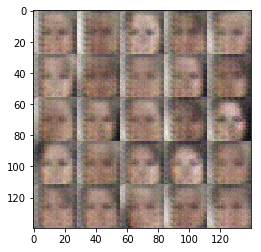

Epoch 1/1... Batch 410... Discriminator Loss: 0.7033... Generator Loss: 1.3956
Epoch 1/1... Batch 420... Discriminator Loss: 0.7600... Generator Loss: 2.1814
Epoch 1/1... Batch 430... Discriminator Loss: 0.8148... Generator Loss: 1.8477
Epoch 1/1... Batch 440... Discriminator Loss: 0.8305... Generator Loss: 1.1745
Epoch 1/1... Batch 450... Discriminator Loss: 0.6708... Generator Loss: 1.6324
Epoch 1/1... Batch 460... Discriminator Loss: 0.6803... Generator Loss: 1.8037
Epoch 1/1... Batch 470... Discriminator Loss: 0.5806... Generator Loss: 2.0826
Epoch 1/1... Batch 480... Discriminator Loss: 0.8256... Generator Loss: 1.1960
Epoch 1/1... Batch 490... Discriminator Loss: 0.8462... Generator Loss: 1.6044
Epoch 1/1... Batch 500... Discriminator Loss: 0.8028... Generator Loss: 1.6998


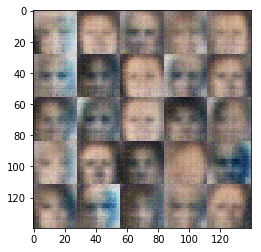

Epoch 1/1... Batch 510... Discriminator Loss: 0.8458... Generator Loss: 1.2858
Epoch 1/1... Batch 520... Discriminator Loss: 0.8399... Generator Loss: 2.2550
Epoch 1/1... Batch 530... Discriminator Loss: 0.9046... Generator Loss: 1.8910
Epoch 1/1... Batch 540... Discriminator Loss: 0.9155... Generator Loss: 1.0482
Epoch 1/1... Batch 550... Discriminator Loss: 1.0491... Generator Loss: 0.8825
Epoch 1/1... Batch 560... Discriminator Loss: 0.6627... Generator Loss: 1.6025
Epoch 1/1... Batch 570... Discriminator Loss: 0.9486... Generator Loss: 1.0003
Epoch 1/1... Batch 580... Discriminator Loss: 0.5836... Generator Loss: 1.7820
Epoch 1/1... Batch 590... Discriminator Loss: 0.8034... Generator Loss: 1.2236
Epoch 1/1... Batch 600... Discriminator Loss: 0.5451... Generator Loss: 2.0958


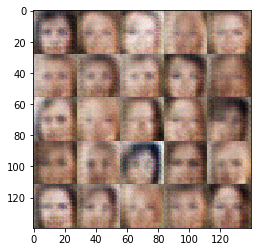

Epoch 1/1... Batch 610... Discriminator Loss: 0.6576... Generator Loss: 2.5737
Epoch 1/1... Batch 620... Discriminator Loss: 0.6324... Generator Loss: 1.6892
Epoch 1/1... Batch 630... Discriminator Loss: 0.5046... Generator Loss: 3.7283
Epoch 1/1... Batch 640... Discriminator Loss: 0.7199... Generator Loss: 1.5791
Epoch 1/1... Batch 650... Discriminator Loss: 0.5865... Generator Loss: 2.2762
Epoch 1/1... Batch 660... Discriminator Loss: 0.5616... Generator Loss: 2.0367
Epoch 1/1... Batch 670... Discriminator Loss: 0.5802... Generator Loss: 1.9128
Epoch 1/1... Batch 680... Discriminator Loss: 0.7405... Generator Loss: 1.2884
Epoch 1/1... Batch 690... Discriminator Loss: 0.5128... Generator Loss: 2.1105
Epoch 1/1... Batch 700... Discriminator Loss: 0.5291... Generator Loss: 3.8953


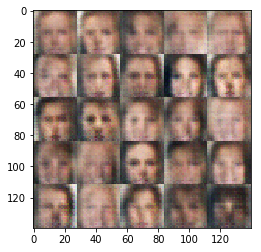

Epoch 1/1... Batch 710... Discriminator Loss: 0.6586... Generator Loss: 3.8527
Epoch 1/1... Batch 720... Discriminator Loss: 0.4611... Generator Loss: 2.6769
Epoch 1/1... Batch 730... Discriminator Loss: 0.5306... Generator Loss: 2.2184
Epoch 1/1... Batch 740... Discriminator Loss: 0.7539... Generator Loss: 4.2089
Epoch 1/1... Batch 750... Discriminator Loss: 0.5641... Generator Loss: 2.0601
Epoch 1/1... Batch 760... Discriminator Loss: 0.7117... Generator Loss: 2.2458
Epoch 1/1... Batch 770... Discriminator Loss: 0.6226... Generator Loss: 2.3987
Epoch 1/1... Batch 780... Discriminator Loss: 0.5165... Generator Loss: 2.4883
Epoch 1/1... Batch 790... Discriminator Loss: 0.4935... Generator Loss: 2.4732
Epoch 1/1... Batch 800... Discriminator Loss: 0.7124... Generator Loss: 3.3953


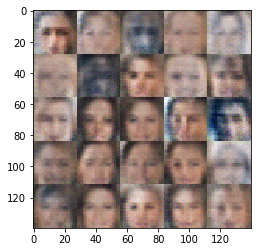

Epoch 1/1... Batch 810... Discriminator Loss: 1.3042... Generator Loss: 4.6728
Epoch 1/1... Batch 820... Discriminator Loss: 0.4925... Generator Loss: 4.1064
Epoch 1/1... Batch 830... Discriminator Loss: 0.5281... Generator Loss: 2.1958
Epoch 1/1... Batch 840... Discriminator Loss: 0.7897... Generator Loss: 1.3062
Epoch 1/1... Batch 850... Discriminator Loss: 1.1476... Generator Loss: 0.7060
Epoch 1/1... Batch 860... Discriminator Loss: 0.7843... Generator Loss: 1.5201
Epoch 1/1... Batch 870... Discriminator Loss: 0.7035... Generator Loss: 2.9616
Epoch 1/1... Batch 880... Discriminator Loss: 0.6515... Generator Loss: 1.7269
Epoch 1/1... Batch 890... Discriminator Loss: 0.7135... Generator Loss: 1.3501
Epoch 1/1... Batch 900... Discriminator Loss: 0.4287... Generator Loss: 3.6299


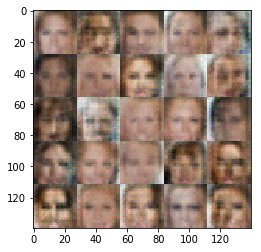

Epoch 1/1... Batch 910... Discriminator Loss: 0.6140... Generator Loss: 1.6219
Epoch 1/1... Batch 920... Discriminator Loss: 0.5727... Generator Loss: 2.0041
Epoch 1/1... Batch 930... Discriminator Loss: 0.8495... Generator Loss: 1.0258
Epoch 1/1... Batch 940... Discriminator Loss: 0.6910... Generator Loss: 1.4145
Epoch 1/1... Batch 950... Discriminator Loss: 0.8219... Generator Loss: 1.2648
Epoch 1/1... Batch 960... Discriminator Loss: 0.4950... Generator Loss: 2.5843
Epoch 1/1... Batch 970... Discriminator Loss: 0.7499... Generator Loss: 1.3695
Epoch 1/1... Batch 980... Discriminator Loss: 0.9000... Generator Loss: 0.9907
Epoch 1/1... Batch 990... Discriminator Loss: 0.6397... Generator Loss: 1.8242
Epoch 1/1... Batch 1000... Discriminator Loss: 0.5515... Generator Loss: 3.1723


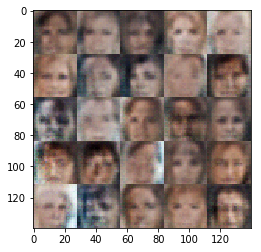

Epoch 1/1... Batch 1010... Discriminator Loss: 0.6793... Generator Loss: 1.5472
Epoch 1/1... Batch 1020... Discriminator Loss: 0.4107... Generator Loss: 3.6906
Epoch 1/1... Batch 1030... Discriminator Loss: 1.2476... Generator Loss: 0.6143
Epoch 1/1... Batch 1040... Discriminator Loss: 0.6672... Generator Loss: 1.8704
Epoch 1/1... Batch 1050... Discriminator Loss: 0.4885... Generator Loss: 2.4094
Epoch 1/1... Batch 1060... Discriminator Loss: 0.6479... Generator Loss: 1.5597
Epoch 1/1... Batch 1070... Discriminator Loss: 0.4780... Generator Loss: 2.6585
Epoch 1/1... Batch 1080... Discriminator Loss: 0.7369... Generator Loss: 1.2918
Epoch 1/1... Batch 1090... Discriminator Loss: 0.9653... Generator Loss: 0.8944
Epoch 1/1... Batch 1100... Discriminator Loss: 0.6324... Generator Loss: 1.6959


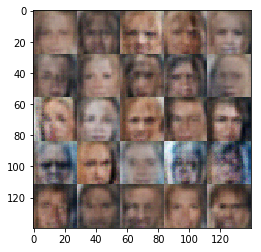

Epoch 1/1... Batch 1110... Discriminator Loss: 0.4508... Generator Loss: 4.1662
Epoch 1/1... Batch 1120... Discriminator Loss: 0.6180... Generator Loss: 1.7139
Epoch 1/1... Batch 1130... Discriminator Loss: 0.6387... Generator Loss: 2.5133
Epoch 1/1... Batch 1140... Discriminator Loss: 0.6984... Generator Loss: 1.4595
Epoch 1/1... Batch 1150... Discriminator Loss: 0.5841... Generator Loss: 2.9211
Epoch 1/1... Batch 1160... Discriminator Loss: 0.6074... Generator Loss: 4.0280
Epoch 1/1... Batch 1170... Discriminator Loss: 1.0019... Generator Loss: 0.9111
Epoch 1/1... Batch 1180... Discriminator Loss: 0.8333... Generator Loss: 1.1187
Epoch 1/1... Batch 1190... Discriminator Loss: 0.8448... Generator Loss: 1.1161
Epoch 1/1... Batch 1200... Discriminator Loss: 0.6372... Generator Loss: 1.9671


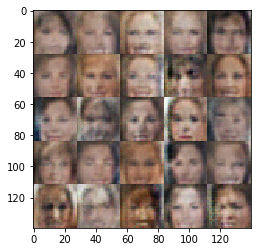

Epoch 1/1... Batch 1210... Discriminator Loss: 0.7861... Generator Loss: 1.2136
Epoch 1/1... Batch 1220... Discriminator Loss: 0.5915... Generator Loss: 2.2558
Epoch 1/1... Batch 1230... Discriminator Loss: 0.5493... Generator Loss: 1.9922
Epoch 1/1... Batch 1240... Discriminator Loss: 0.5337... Generator Loss: 2.3293
Epoch 1/1... Batch 1250... Discriminator Loss: 0.4804... Generator Loss: 2.3222
Epoch 1/1... Batch 1260... Discriminator Loss: 0.7190... Generator Loss: 1.3348
Epoch 1/1... Batch 1270... Discriminator Loss: 0.7597... Generator Loss: 3.4538
Epoch 1/1... Batch 1280... Discriminator Loss: 0.5024... Generator Loss: 2.1916
Epoch 1/1... Batch 1290... Discriminator Loss: 0.5462... Generator Loss: 2.0984
Epoch 1/1... Batch 1300... Discriminator Loss: 0.5764... Generator Loss: 1.7669


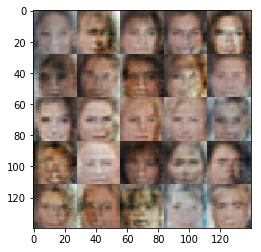

Epoch 1/1... Batch 1310... Discriminator Loss: 0.5831... Generator Loss: 1.7733
Epoch 1/1... Batch 1320... Discriminator Loss: 0.5238... Generator Loss: 2.1604
Epoch 1/1... Batch 1330... Discriminator Loss: 1.0696... Generator Loss: 0.7851
Epoch 1/1... Batch 1340... Discriminator Loss: 0.4271... Generator Loss: 3.4351
Epoch 1/1... Batch 1350... Discriminator Loss: 0.6412... Generator Loss: 2.7279
Epoch 1/1... Batch 1360... Discriminator Loss: 0.4461... Generator Loss: 3.4460
Epoch 1/1... Batch 1370... Discriminator Loss: 0.7436... Generator Loss: 1.2932
Epoch 1/1... Batch 1380... Discriminator Loss: 0.4718... Generator Loss: 2.7473
Epoch 1/1... Batch 1390... Discriminator Loss: 1.3639... Generator Loss: 0.5282
Epoch 1/1... Batch 1400... Discriminator Loss: 0.6294... Generator Loss: 3.8347


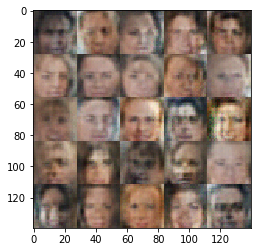

Epoch 1/1... Batch 1410... Discriminator Loss: 0.8760... Generator Loss: 2.6320
Epoch 1/1... Batch 1420... Discriminator Loss: 0.7235... Generator Loss: 1.6086
Epoch 1/1... Batch 1430... Discriminator Loss: 0.4585... Generator Loss: 2.7870
Epoch 1/1... Batch 1440... Discriminator Loss: 1.2759... Generator Loss: 2.7927
Epoch 1/1... Batch 1450... Discriminator Loss: 0.5914... Generator Loss: 2.2039
Epoch 1/1... Batch 1460... Discriminator Loss: 1.3313... Generator Loss: 0.5500
Epoch 1/1... Batch 1470... Discriminator Loss: 0.4988... Generator Loss: 2.9272
Epoch 1/1... Batch 1480... Discriminator Loss: 0.6432... Generator Loss: 1.5629
Epoch 1/1... Batch 1490... Discriminator Loss: 0.5964... Generator Loss: 1.9323
Epoch 1/1... Batch 1500... Discriminator Loss: 0.7607... Generator Loss: 2.8371


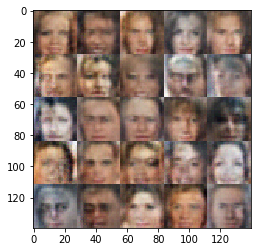

Epoch 1/1... Batch 1510... Discriminator Loss: 0.4014... Generator Loss: 4.8137
Epoch 1/1... Batch 1520... Discriminator Loss: 0.5562... Generator Loss: 5.2358
Epoch 1/1... Batch 1530... Discriminator Loss: 0.6646... Generator Loss: 2.6007
Epoch 1/1... Batch 1540... Discriminator Loss: 0.4452... Generator Loss: 2.5835
Epoch 1/1... Batch 1550... Discriminator Loss: 0.6142... Generator Loss: 2.6908
Epoch 1/1... Batch 1560... Discriminator Loss: 0.3843... Generator Loss: 3.6514
Epoch 1/1... Batch 1570... Discriminator Loss: 0.6138... Generator Loss: 1.9002
Epoch 1/1... Batch 1580... Discriminator Loss: 0.5389... Generator Loss: 2.9726
Epoch 1/1... Batch 1590... Discriminator Loss: 0.3622... Generator Loss: 4.4000
Epoch 1/1... Batch 1600... Discriminator Loss: 0.4240... Generator Loss: 3.7209


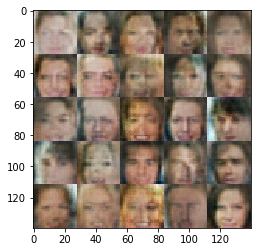

Epoch 1/1... Batch 1610... Discriminator Loss: 1.3013... Generator Loss: 0.5958
Epoch 1/1... Batch 1620... Discriminator Loss: 0.8334... Generator Loss: 1.4359
Epoch 1/1... Batch 1630... Discriminator Loss: 1.1645... Generator Loss: 0.6796
Epoch 1/1... Batch 1640... Discriminator Loss: 0.4951... Generator Loss: 2.7467
Epoch 1/1... Batch 1650... Discriminator Loss: 0.5892... Generator Loss: 1.8813
Epoch 1/1... Batch 1660... Discriminator Loss: 0.5348... Generator Loss: 2.0763
Epoch 1/1... Batch 1670... Discriminator Loss: 0.4867... Generator Loss: 4.6529
Epoch 1/1... Batch 1680... Discriminator Loss: 0.5288... Generator Loss: 2.0438
Epoch 1/1... Batch 1690... Discriminator Loss: 0.6052... Generator Loss: 1.6819
Epoch 1/1... Batch 1700... Discriminator Loss: 0.4278... Generator Loss: 2.7822


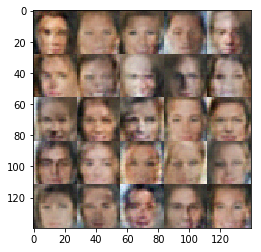

Epoch 1/1... Batch 1710... Discriminator Loss: 1.4101... Generator Loss: 0.4883
Epoch 1/1... Batch 1720... Discriminator Loss: 0.6139... Generator Loss: 2.2899
Epoch 1/1... Batch 1730... Discriminator Loss: 0.5815... Generator Loss: 2.9209
Epoch 1/1... Batch 1740... Discriminator Loss: 0.7299... Generator Loss: 1.2791
Epoch 1/1... Batch 1750... Discriminator Loss: 0.5832... Generator Loss: 1.7795
Epoch 1/1... Batch 1760... Discriminator Loss: 1.3417... Generator Loss: 0.5832
Epoch 1/1... Batch 1770... Discriminator Loss: 0.9757... Generator Loss: 0.8812
Epoch 1/1... Batch 1780... Discriminator Loss: 0.5003... Generator Loss: 3.3383
Epoch 1/1... Batch 1790... Discriminator Loss: 0.5599... Generator Loss: 2.3981
Epoch 1/1... Batch 1800... Discriminator Loss: 1.4349... Generator Loss: 0.4813


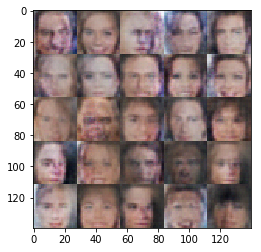

Epoch 1/1... Batch 1810... Discriminator Loss: 0.7031... Generator Loss: 4.0902
Epoch 1/1... Batch 1820... Discriminator Loss: 0.3833... Generator Loss: 3.6487
Epoch 1/1... Batch 1830... Discriminator Loss: 0.7193... Generator Loss: 1.6912
Epoch 1/1... Batch 1840... Discriminator Loss: 0.6962... Generator Loss: 2.3592
Epoch 1/1... Batch 1850... Discriminator Loss: 0.5229... Generator Loss: 3.6729
Epoch 1/1... Batch 1860... Discriminator Loss: 1.1844... Generator Loss: 0.6663
Epoch 1/1... Batch 1870... Discriminator Loss: 0.4920... Generator Loss: 2.5270
Epoch 1/1... Batch 1880... Discriminator Loss: 1.2414... Generator Loss: 0.6599
Epoch 1/1... Batch 1890... Discriminator Loss: 0.6613... Generator Loss: 2.2832
Epoch 1/1... Batch 1900... Discriminator Loss: 0.8225... Generator Loss: 1.0897


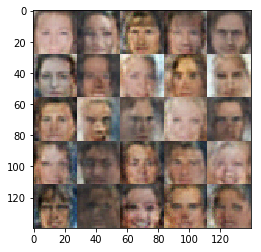

Epoch 1/1... Batch 1910... Discriminator Loss: 1.1424... Generator Loss: 0.6783
Epoch 1/1... Batch 1920... Discriminator Loss: 0.5385... Generator Loss: 2.1240
Epoch 1/1... Batch 1930... Discriminator Loss: 1.5521... Generator Loss: 0.4176
Epoch 1/1... Batch 1940... Discriminator Loss: 0.3521... Generator Loss: 4.6705
Epoch 1/1... Batch 1950... Discriminator Loss: 0.4548... Generator Loss: 2.7358
Epoch 1/1... Batch 1960... Discriminator Loss: 0.5668... Generator Loss: 1.9062
Epoch 1/1... Batch 1970... Discriminator Loss: 0.7269... Generator Loss: 1.4214
Epoch 1/1... Batch 1980... Discriminator Loss: 0.7515... Generator Loss: 1.2653
Epoch 1/1... Batch 1990... Discriminator Loss: 0.4328... Generator Loss: 2.7473
Epoch 1/1... Batch 2000... Discriminator Loss: 0.9102... Generator Loss: 1.0868


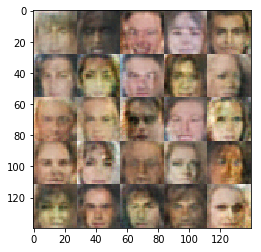

Epoch 1/1... Batch 2010... Discriminator Loss: 1.7727... Generator Loss: 0.3260
Epoch 1/1... Batch 2020... Discriminator Loss: 1.3006... Generator Loss: 0.5744
Epoch 1/1... Batch 2030... Discriminator Loss: 0.8765... Generator Loss: 1.0224
Epoch 1/1... Batch 2040... Discriminator Loss: 0.3910... Generator Loss: 3.4242
Epoch 1/1... Batch 2050... Discriminator Loss: 0.5587... Generator Loss: 2.3185
Epoch 1/1... Batch 2060... Discriminator Loss: 0.4309... Generator Loss: 3.0355
Epoch 1/1... Batch 2070... Discriminator Loss: 0.3658... Generator Loss: 4.1795
Epoch 1/1... Batch 2080... Discriminator Loss: 0.7049... Generator Loss: 1.3739
Epoch 1/1... Batch 2090... Discriminator Loss: 1.5751... Generator Loss: 0.4179
Epoch 1/1... Batch 2100... Discriminator Loss: 0.8558... Generator Loss: 1.0815


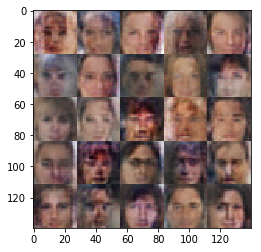

Epoch 1/1... Batch 2110... Discriminator Loss: 0.6177... Generator Loss: 2.1771
Epoch 1/1... Batch 2120... Discriminator Loss: 0.6348... Generator Loss: 1.6639
Epoch 1/1... Batch 2130... Discriminator Loss: 1.0206... Generator Loss: 4.1662
Epoch 1/1... Batch 2140... Discriminator Loss: 0.4922... Generator Loss: 3.9043
Epoch 1/1... Batch 2150... Discriminator Loss: 0.4471... Generator Loss: 2.5766
Epoch 1/1... Batch 2160... Discriminator Loss: 0.4332... Generator Loss: 3.2979
Epoch 1/1... Batch 2170... Discriminator Loss: 0.3890... Generator Loss: 3.6880
Epoch 1/1... Batch 2180... Discriminator Loss: 0.8192... Generator Loss: 1.8790
Epoch 1/1... Batch 2190... Discriminator Loss: 0.4524... Generator Loss: 2.8975
Epoch 1/1... Batch 2200... Discriminator Loss: 0.7820... Generator Loss: 1.2685


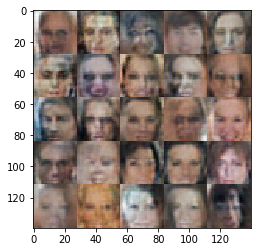

Epoch 1/1... Batch 2210... Discriminator Loss: 1.1784... Generator Loss: 0.6881
Epoch 1/1... Batch 2220... Discriminator Loss: 0.3775... Generator Loss: 3.6702
Epoch 1/1... Batch 2230... Discriminator Loss: 0.5249... Generator Loss: 2.1979
Epoch 1/1... Batch 2240... Discriminator Loss: 0.7310... Generator Loss: 1.4095
Epoch 1/1... Batch 2250... Discriminator Loss: 0.5274... Generator Loss: 2.0685
Epoch 1/1... Batch 2260... Discriminator Loss: 0.7456... Generator Loss: 1.2537
Epoch 1/1... Batch 2270... Discriminator Loss: 0.3690... Generator Loss: 4.1257
Epoch 1/1... Batch 2280... Discriminator Loss: 0.4814... Generator Loss: 2.8190
Epoch 1/1... Batch 2290... Discriminator Loss: 0.5622... Generator Loss: 1.8647
Epoch 1/1... Batch 2300... Discriminator Loss: 0.4105... Generator Loss: 3.0954


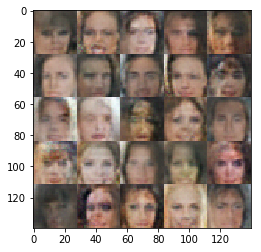

Epoch 1/1... Batch 2310... Discriminator Loss: 0.4560... Generator Loss: 3.7814
Epoch 1/1... Batch 2320... Discriminator Loss: 0.4570... Generator Loss: 2.5608
Epoch 1/1... Batch 2330... Discriminator Loss: 1.0217... Generator Loss: 4.7036
Epoch 1/1... Batch 2340... Discriminator Loss: 0.7851... Generator Loss: 2.8539
Epoch 1/1... Batch 2350... Discriminator Loss: 1.2361... Generator Loss: 0.6462
Epoch 1/1... Batch 2360... Discriminator Loss: 0.9292... Generator Loss: 1.1044
Epoch 1/1... Batch 2370... Discriminator Loss: 1.0103... Generator Loss: 0.8398
Epoch 1/1... Batch 2380... Discriminator Loss: 1.3578... Generator Loss: 0.5308
Epoch 1/1... Batch 2390... Discriminator Loss: 0.3717... Generator Loss: 4.0596
Epoch 1/1... Batch 2400... Discriminator Loss: 0.5910... Generator Loss: 1.8123


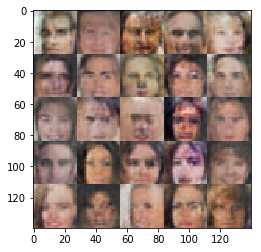

Epoch 1/1... Batch 2410... Discriminator Loss: 0.5716... Generator Loss: 1.8044
Epoch 1/1... Batch 2420... Discriminator Loss: 0.7675... Generator Loss: 4.7902
Epoch 1/1... Batch 2430... Discriminator Loss: 0.3657... Generator Loss: 4.7555
Epoch 1/1... Batch 2440... Discriminator Loss: 0.5496... Generator Loss: 1.9149
Epoch 1/1... Batch 2450... Discriminator Loss: 0.5027... Generator Loss: 2.5336
Epoch 1/1... Batch 2460... Discriminator Loss: 0.3879... Generator Loss: 3.2338
Epoch 1/1... Batch 2470... Discriminator Loss: 0.3736... Generator Loss: 7.6000
Epoch 1/1... Batch 2480... Discriminator Loss: 0.4425... Generator Loss: 2.6382
Epoch 1/1... Batch 2490... Discriminator Loss: 0.3596... Generator Loss: 4.6938
Epoch 1/1... Batch 2500... Discriminator Loss: 0.3777... Generator Loss: 4.0812


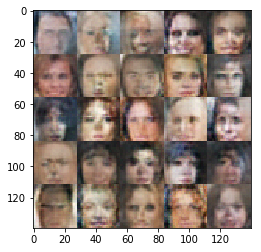

Epoch 1/1... Batch 2510... Discriminator Loss: 0.3757... Generator Loss: 3.9481
Epoch 1/1... Batch 2520... Discriminator Loss: 0.3614... Generator Loss: 4.4786
Epoch 1/1... Batch 2530... Discriminator Loss: 1.6490... Generator Loss: 5.2341
Epoch 1/1... Batch 2540... Discriminator Loss: 0.6278... Generator Loss: 2.3826
Epoch 1/1... Batch 2550... Discriminator Loss: 1.1418... Generator Loss: 2.1683
Epoch 1/1... Batch 2560... Discriminator Loss: 0.3617... Generator Loss: 4.6249
Epoch 1/1... Batch 2570... Discriminator Loss: 0.6993... Generator Loss: 1.6301
Epoch 1/1... Batch 2580... Discriminator Loss: 0.3609... Generator Loss: 4.5320
Epoch 1/1... Batch 2590... Discriminator Loss: 0.4250... Generator Loss: 6.8882
Epoch 1/1... Batch 2600... Discriminator Loss: 0.7373... Generator Loss: 2.8319


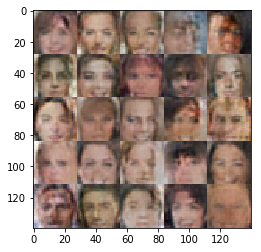

Epoch 1/1... Batch 2610... Discriminator Loss: 0.3638... Generator Loss: 7.9638
Epoch 1/1... Batch 2620... Discriminator Loss: 0.3607... Generator Loss: 5.1763
Epoch 1/1... Batch 2630... Discriminator Loss: 1.4814... Generator Loss: 4.9731
Epoch 1/1... Batch 2640... Discriminator Loss: 0.3511... Generator Loss: 4.9383
Epoch 1/1... Batch 2650... Discriminator Loss: 0.3493... Generator Loss: 7.2519
Epoch 1/1... Batch 2660... Discriminator Loss: 1.2759... Generator Loss: 0.6959
Epoch 1/1... Batch 2670... Discriminator Loss: 0.3579... Generator Loss: 5.8312
Epoch 1/1... Batch 2680... Discriminator Loss: 0.5953... Generator Loss: 5.7775
Epoch 1/1... Batch 2690... Discriminator Loss: 0.3656... Generator Loss: 4.1667
Epoch 1/1... Batch 2700... Discriminator Loss: 0.4526... Generator Loss: 2.6334


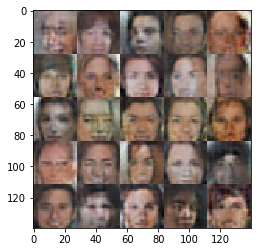

Epoch 1/1... Batch 2710... Discriminator Loss: 0.3529... Generator Loss: 6.0704
Epoch 1/1... Batch 2720... Discriminator Loss: 1.8751... Generator Loss: 0.2925
Epoch 1/1... Batch 2730... Discriminator Loss: 0.6829... Generator Loss: 1.3977
Epoch 1/1... Batch 2740... Discriminator Loss: 1.1858... Generator Loss: 0.9433
Epoch 1/1... Batch 2750... Discriminator Loss: 0.4627... Generator Loss: 2.3645
Epoch 1/1... Batch 2760... Discriminator Loss: 0.4607... Generator Loss: 2.5176
Epoch 1/1... Batch 2770... Discriminator Loss: 0.3912... Generator Loss: 5.5771
Epoch 1/1... Batch 2780... Discriminator Loss: 1.3367... Generator Loss: 0.5601
Epoch 1/1... Batch 2790... Discriminator Loss: 0.6907... Generator Loss: 1.4396
Epoch 1/1... Batch 2800... Discriminator Loss: 0.4841... Generator Loss: 4.3343


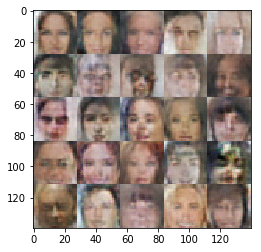

Epoch 1/1... Batch 2810... Discriminator Loss: 0.6702... Generator Loss: 2.2041
Epoch 1/1... Batch 2820... Discriminator Loss: 0.3819... Generator Loss: 6.3109
Epoch 1/1... Batch 2830... Discriminator Loss: 0.3576... Generator Loss: 8.3791
Epoch 1/1... Batch 2840... Discriminator Loss: 0.3445... Generator Loss: 7.6219
Epoch 1/1... Batch 2850... Discriminator Loss: 1.1763... Generator Loss: 0.7189
Epoch 1/1... Batch 2860... Discriminator Loss: 0.4099... Generator Loss: 3.1368
Epoch 1/1... Batch 2870... Discriminator Loss: 0.4008... Generator Loss: 3.6400
Epoch 1/1... Batch 2880... Discriminator Loss: 0.3728... Generator Loss: 3.9347
Epoch 1/1... Batch 2890... Discriminator Loss: 0.5049... Generator Loss: 2.9505
Epoch 1/1... Batch 2900... Discriminator Loss: 0.5188... Generator Loss: 5.2686


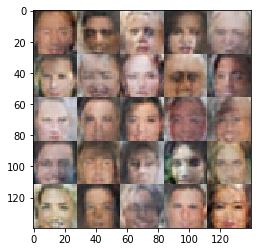

Epoch 1/1... Batch 2910... Discriminator Loss: 0.3908... Generator Loss: 6.1998
Epoch 1/1... Batch 2920... Discriminator Loss: 1.0596... Generator Loss: 1.3842
Epoch 1/1... Batch 2930... Discriminator Loss: 0.4323... Generator Loss: 2.9147
Epoch 1/1... Batch 2940... Discriminator Loss: 0.9289... Generator Loss: 0.9384
Epoch 1/1... Batch 2950... Discriminator Loss: 0.8243... Generator Loss: 1.1127
Epoch 1/1... Batch 2960... Discriminator Loss: 0.3757... Generator Loss: 6.7540
Epoch 1/1... Batch 2970... Discriminator Loss: 0.5885... Generator Loss: 1.8559
Epoch 1/1... Batch 2980... Discriminator Loss: 0.8509... Generator Loss: 1.0659
Epoch 1/1... Batch 2990... Discriminator Loss: 0.3814... Generator Loss: 5.3205
Epoch 1/1... Batch 3000... Discriminator Loss: 0.4694... Generator Loss: 2.7848


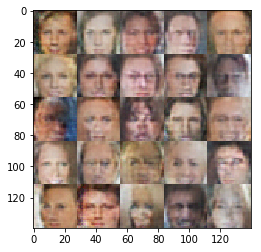

Epoch 1/1... Batch 3010... Discriminator Loss: 0.5440... Generator Loss: 2.0355
Epoch 1/1... Batch 3020... Discriminator Loss: 0.3915... Generator Loss: 4.4235
Epoch 1/1... Batch 3030... Discriminator Loss: 0.3790... Generator Loss: 3.8089
Epoch 1/1... Batch 3040... Discriminator Loss: 0.4445... Generator Loss: 2.7614
Epoch 1/1... Batch 3050... Discriminator Loss: 0.9747... Generator Loss: 0.8569
Epoch 1/1... Batch 3060... Discriminator Loss: 0.4067... Generator Loss: 8.1283
Epoch 1/1... Batch 3070... Discriminator Loss: 0.6212... Generator Loss: 2.2244
Epoch 1/1... Batch 3080... Discriminator Loss: 0.3972... Generator Loss: 3.1465
Epoch 1/1... Batch 3090... Discriminator Loss: 0.5283... Generator Loss: 2.3615
Epoch 1/1... Batch 3100... Discriminator Loss: 0.3397... Generator Loss: 6.8636


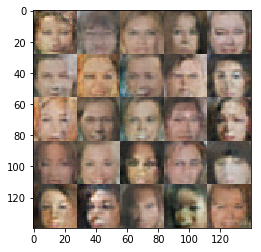

Epoch 1/1... Batch 3110... Discriminator Loss: 0.6102... Generator Loss: 3.0248
Epoch 1/1... Batch 3120... Discriminator Loss: 0.4715... Generator Loss: 4.0369
Epoch 1/1... Batch 3130... Discriminator Loss: 0.3923... Generator Loss: 5.5059
Epoch 1/1... Batch 3140... Discriminator Loss: 0.3715... Generator Loss: 5.5849
Epoch 1/1... Batch 3150... Discriminator Loss: 0.6639... Generator Loss: 1.9568
Epoch 1/1... Batch 3160... Discriminator Loss: 0.7035... Generator Loss: 5.6049


In [61]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.